In [2]:
# import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import missingno as msno

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#load data
historical_transactions = pd.read_csv('historical_transactions.csv')
merchants = pd.read_csv('merchants.csv')
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv')
userscore = pd.read_csv('userscore.csv')

### Describe how I want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction.

In [4]:
historical_transactions.shape

(29112361, 14)

In [5]:
merchants.shape

(334696, 22)

In [6]:
new_merchant_transactions.shape

(1963031, 14)

In [7]:
userscore.shape

(201917, 6)

In [8]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [10]:
new_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [11]:
userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [12]:
historical_transactions.describe(include='all')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,29112361,29112361,2.911236e+07,29112361,2.911236e+07,28934202,2.911236e+07,28973880,2.911236e+07,2.911236e+07,29112361,2.645950e+07,2.911236e+07,2.911236e+07
unique,2,325540,NaN,2,NaN,3,NaN,326311,NaN,NaN,16395300,NaN,NaN,NaN
top,Y,C_ID_3d3dfdc692,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,26595452,5582,NaN,27028332,NaN,15411747,NaN,1115097,NaN,NaN,26184,NaN,NaN,NaN
mean,NaN,NaN,1.293256e+02,NaN,6.484954e-01,NaN,4.810130e+02,NaN,-4.487294e+00,3.640090e-02,NaN,2.194578e+00,1.056679e+01,2.684839e+01
std,NaN,NaN,1.042563e+02,NaN,2.795577e+00,NaN,2.493757e+02,NaN,3.588800e+00,1.123522e+03,NaN,1.531896e+00,6.366927e+00,9.692793e+00
min,NaN,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,-1.300000e+01,-7.469078e-01,NaN,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,NaN,NaN,5.300000e+01,NaN,0.000000e+00,NaN,3.070000e+02,NaN,-7.000000e+00,-7.203559e-01,NaN,1.000000e+00,9.000000e+00,1.900000e+01
50%,NaN,NaN,9.000000e+01,NaN,0.000000e+00,NaN,4.540000e+02,NaN,-4.000000e+00,-6.883495e-01,NaN,1.000000e+00,9.000000e+00,2.900000e+01
75%,NaN,NaN,2.120000e+02,NaN,1.000000e+00,NaN,7.050000e+02,NaN,-2.000000e+00,-6.032543e-01,NaN,3.000000e+00,1.600000e+01,3.400000e+01


In [5]:
#checking the null values of the tables
historical_transactions.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [12]:
merchants.isna().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [14]:
#chech duplicates
historical_transactions.duplicated().sum()

0

In [4]:
#concatting the tables(historical_transactions,new_merchant_transactions)
result=pd.concat([historical_transactions,new_merchant_transactions])
result.shape

(31075392, 14)

In [7]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31075392 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.5+ GB


In [5]:
#merging the result table with merchants table
result2 = pd.merge(result, merchants, on=["merchant_id","city_id","category_1","subsector_id","merchant_category_id","category_2","state_id"], how="inner")
result2

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289039,Y,C_ID_cf615e2bb8,296,N,0,A,68,M_ID_16a7d71c54,2,-0.686802,...,1.20,1.055556,3,2.20,1.527778,6,2.10,1.638889,12,N
20289040,Y,C_ID_2747b3a8ec,212,N,-1,NaN,34,M_ID_d1f0c32fe8,1,-0.228493,...,1.69,1.333333,3,2.67,2.333333,6,3.03,2.555556,12,Y
20289041,Y,C_ID_729db768e1,261,N,0,A,273,M_ID_7ebe45f784,2,-0.731881,...,0.49,0.727273,3,0.52,0.606061,6,0.48,0.621212,12,N
20289042,Y,C_ID_09f3c45b34,296,N,0,A,278,M_ID_ca64cb9e56,2,-0.671925,...,1.07,0.904762,3,1.23,1.007937,6,1.30,1.075397,12,N


In [6]:
#merging the result table with userscore table
result3 = pd.merge(result2, userscore, on="card_id" , how="inner")
result3.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
count,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.137688e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,...,1.255785e+07,1.256365e+07,1.256365e+07,1.255785e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07
mean,1.225711e+02,6.402080e-01,4.614522e+02,-4.137216e+00,2.456488e-01,2.172455e+00,1.072592e+01,2.684501e+01,2.403994e+04,4.322102e+00,...,7.136807e+01,inf,5.996990e+00,6.726357e+01,inf,1.193341e+01,3.099102e+00,1.733425e+00,5.406364e-01,-4.649742e-01
std,9.600395e+01,2.518455e+00,2.409172e+02,3.772919e+00,1.701168e+03,1.516505e+00,6.427992e+00,1.002161e+01,3.227986e+04,2.027151e+01,...,7.511331e+03,NaN,9.525070e-02,7.522398e+03,NaN,5.272832e-01,1.267184e+00,7.138124e-01,4.983460e-01,3.605745e+00
min,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-5.747065e-02,...,-2.250000e+00,1.670447e-01,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.321928e+01
25%,5.300000e+01,0.000000e+00,2.780000e+02,-7.000000e+00,-7.213627e-01,1.000000e+00,9.000000e+00,1.900000e+01,3.500000e+01,-5.747065e-02,...,9.500000e-01,9.711271e-01,6.000000e+00,9.500000e-01,9.716296e-01,1.200000e+01,2.000000e+00,1.000000e+00,0.000000e+00,-8.066553e-01
50%,8.800000e+01,0.000000e+00,4.370000e+02,-3.000000e+00,-6.903480e-01,1.000000e+00,9.000000e+00,3.300000e+01,5.716000e+03,-3.764084e-02,...,1.020000e+00,1.033136e+00,6.000000e+00,1.040000e+00,1.052381e+00,1.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,-9.086313e-02
75%,1.890000e+02,1.000000e+00,7.050000e+02,-1.000000e+00,-6.089644e-01,3.000000e+00,1.600000e+01,3.400000e+01,4.133100e+04,2.598063e-01,...,1.120000e+00,1.117166e+00,6.000000e+00,1.160000e+00,1.154022e+00,1.200000e+01,4.000000e+00,2.000000e+00,1.000000e+00,5.339889e-01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01,1.125860e+05,1.727197e+02,...,1.513959e+06,inf,6.000000e+00,2.567408e+06,inf,1.200000e+01,5.000000e+00,3.000000e+00,1.000000e+00,1.796507e+01


 #### Discuss the quality of the dataset

In [7]:
result3.replace([np.inf, -np.inf], np.nan, inplace=True)
result3.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
count,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.137688e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,...,1.255785e+07,1.256365e+07,1.256365e+07,1.255785e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07
mean,1.225711e+02,6.402080e-01,4.614522e+02,-4.137216e+00,2.456488e-01,2.172455e+00,1.072592e+01,2.684501e+01,2.403994e+04,4.322102e+00,...,7.136807e+01,7.685485e+00,5.996990e+00,6.726357e+01,8.184718e+00,1.193341e+01,3.099102e+00,1.733425e+00,5.406364e-01,-4.649742e-01
std,9.600395e+01,2.518455e+00,2.409172e+02,3.772919e+00,1.701168e+03,1.516505e+00,6.427992e+00,1.002161e+01,3.227986e+04,2.027151e+01,...,7.511331e+03,5.203812e+02,9.525070e-02,7.522398e+03,4.748992e+02,5.272832e-01,1.267184e+00,7.138124e-01,4.983460e-01,3.605745e+00
min,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-5.747065e-02,...,-2.250000e+00,1.670447e-01,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.321928e+01
25%,5.300000e+01,0.000000e+00,2.780000e+02,-7.000000e+00,-7.213627e-01,1.000000e+00,9.000000e+00,1.900000e+01,3.500000e+01,-5.747065e-02,...,9.500000e-01,9.711271e-01,6.000000e+00,9.500000e-01,9.716296e-01,1.200000e+01,2.000000e+00,1.000000e+00,0.000000e+00,-8.066553e-01
50%,8.800000e+01,0.000000e+00,4.370000e+02,-3.000000e+00,-6.903480e-01,1.000000e+00,9.000000e+00,3.300000e+01,5.716000e+03,-3.764084e-02,...,1.020000e+00,1.033136e+00,6.000000e+00,1.040000e+00,1.052381e+00,1.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,-9.086313e-02
75%,1.890000e+02,1.000000e+00,7.050000e+02,-1.000000e+00,-6.089644e-01,3.000000e+00,1.600000e+01,3.400000e+01,4.133100e+04,2.598063e-01,...,1.120000e+00,1.117166e+00,6.000000e+00,1.160000e+00,1.154022e+00,1.200000e+01,4.000000e+00,2.000000e+00,1.000000e+00,5.339889e-01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01,1.125860e+05,1.727197e+02,...,1.513959e+06,5.607750e+04,6.000000e+00,2.567408e+06,5.021556e+04,1.200000e+01,5.000000e+00,3.000000e+00,1.000000e+00,1.796507e+01


In [11]:
#virtualize the data correlation
res = result3.select_dtypes(include=['int', 'float'])
corr = res.corr()
corr.style.background_gradient(cmap='coolwarm')

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
city_id,1.000000,-0.047914,-0.063329,-0.008315,-0.000123,0.035044,0.151519,0.080496,-0.036797,-0.090955,-0.089406,-0.005053,-0.006244,-0.006762,-0.004154,-0.008975,-0.003992,-0.003104,-0.011396,0.018178,0.022312,0.017751,0.057192,0.018930
installments,-0.047914,1.000000,0.022620,0.004011,-0.000048,0.001250,-0.069833,-0.075791,-0.005948,-0.017494,-0.017478,-0.000230,0.001210,-0.001329,-0.000183,0.004766,-0.001658,-0.000129,0.008120,-0.004009,-0.009599,-0.070862,-0.089307,-0.010526
merchant_category_id,-0.063329,0.022620,1.000000,-0.006368,0.000195,0.002830,-0.124051,-0.065990,-0.013043,-0.144402,-0.145281,-0.005986,-0.005222,-0.003508,-0.005649,-0.003078,-0.003267,-0.005073,-0.000945,-0.005683,-0.029663,-0.009389,-0.022637,-0.009263
month_lag,-0.008315,0.004011,-0.006368,1.000000,0.000047,-0.000355,-0.012616,-0.008129,0.007709,-0.013055,-0.012968,-0.011272,-0.011354,0.005618,-0.011120,-0.011491,0.006268,-0.010387,-0.011563,-0.039603,-0.048368,-0.050051,-0.053239,-0.022122
purchase_amount,-0.000123,-0.000048,0.000195,0.000047,1.000000,-0.000195,-0.000061,0.000221,-0.000060,-0.000063,-0.000062,-0.000004,-0.000004,-0.000001,-0.000004,-0.000004,0.000006,-0.000004,-0.000003,0.000024,-0.000006,-0.000283,0.000252,0.000041
category_2,0.035044,0.001250,0.002830,-0.000355,-0.000195,1.000000,0.184048,0.004166,0.014291,-0.123530,-0.121440,-0.007492,-0.007479,-0.009261,-0.007449,-0.007499,-0.008128,-0.006965,-0.007583,-0.022255,-0.034752,0.125087,-0.015407,0.005865
state_id,0.151519,-0.069833,-0.124051,-0.012616,-0.000061,0.184048,1.000000,0.150629,-0.034021,-0.014648,-0.014558,-0.002440,-0.004015,-0.008094,-0.002384,-0.007862,-0.005065,-0.002227,-0.011439,-0.017265,-0.002025,0.092349,0.048606,0.018922
subsector_id,0.080496,-0.075791,-0.065990,-0.008129,0.000221,0.004166,0.150629,1.000000,-0.024045,0.153956,0.156104,-0.004524,-0.006732,0.006975,-0.004767,-0.012237,0.005114,-0.004709,-0.017352,0.038331,-0.059145,0.018530,-0.016962,0.014632
merchant_group_id,-0.036797,-0.005948,-0.013043,0.007709,-0.000060,0.014291,-0.034021,-0.024045,1.000000,-0.159541,-0.157312,-0.006780,-0.007477,-0.002405,-0.006211,-0.008998,-0.008952,-0.005376,-0.010374,0.003762,0.023158,0.012764,0.019375,-0.005476
numerical_1,-0.090955,-0.017494,-0.144402,-0.013055,-0.000063,-0.123530,-0.014648,0.153956,-0.159541,1.000000,0.999475,-0.002018,-0.002207,0.003195,-0.002021,-0.002731,0.006822,-0.001899,-0.003204,0.027266,-0.014979,-0.022605,-0.000161,0.000112


In [10]:
result3.isna().sum()

authorized_flag                      0
card_id                              0
city_id                              0
category_1                           0
installments                         0
category_3                       87408
merchant_category_id                 0
merchant_id                          0
month_lag                            0
purchase_amount                      0
purchase_date                        0
category_2                     1186777
state_id                             0
subsector_id                         0
merchant_group_id                    0
numerical_1                          0
numerical_2                          0
most_recent_sales_range              0
most_recent_purchases_range          0
avg_sales_lag3                    5806
avg_purchases_lag3                   3
active_months_lag3                   0
avg_sales_lag6                    5806
avg_purchases_lag6                   3
active_months_lag6                   0
avg_sales_lag12          

,Total missing,% missing
category_2,1186777,9.446115
category_3,87408,0.695721
avg_sales_lag3,5806,0.046213
avg_sales_lag12,5806,0.046213
avg_sales_lag6,5806,0.046213
avg_purchases_lag3,0,0.000000
active_months_lag3,0,0.000000
avg_purchases_lag6,0,0.000000
active_months_lag6,0,0.000000
authorized_flag,0,0.000000


<Axes: >

<Axes: >

<Axes: >

<Axes: >

,category_3,category_2,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12
category_3,1.00000,-0.018010,-0.001800,-0.001800,-0.001800
category_2,-0.01801,1.000000,0.066537,0.066537,0.066537
avg_sales_lag3,-0.00180,0.066537,1.000000,1.000000,1.000000
avg_sales_lag6,-0.00180,0.066537,1.000000,1.000000,1.000000
avg_sales_lag12,-0.00180,0.066537,1.000000,1.000000,1.000000


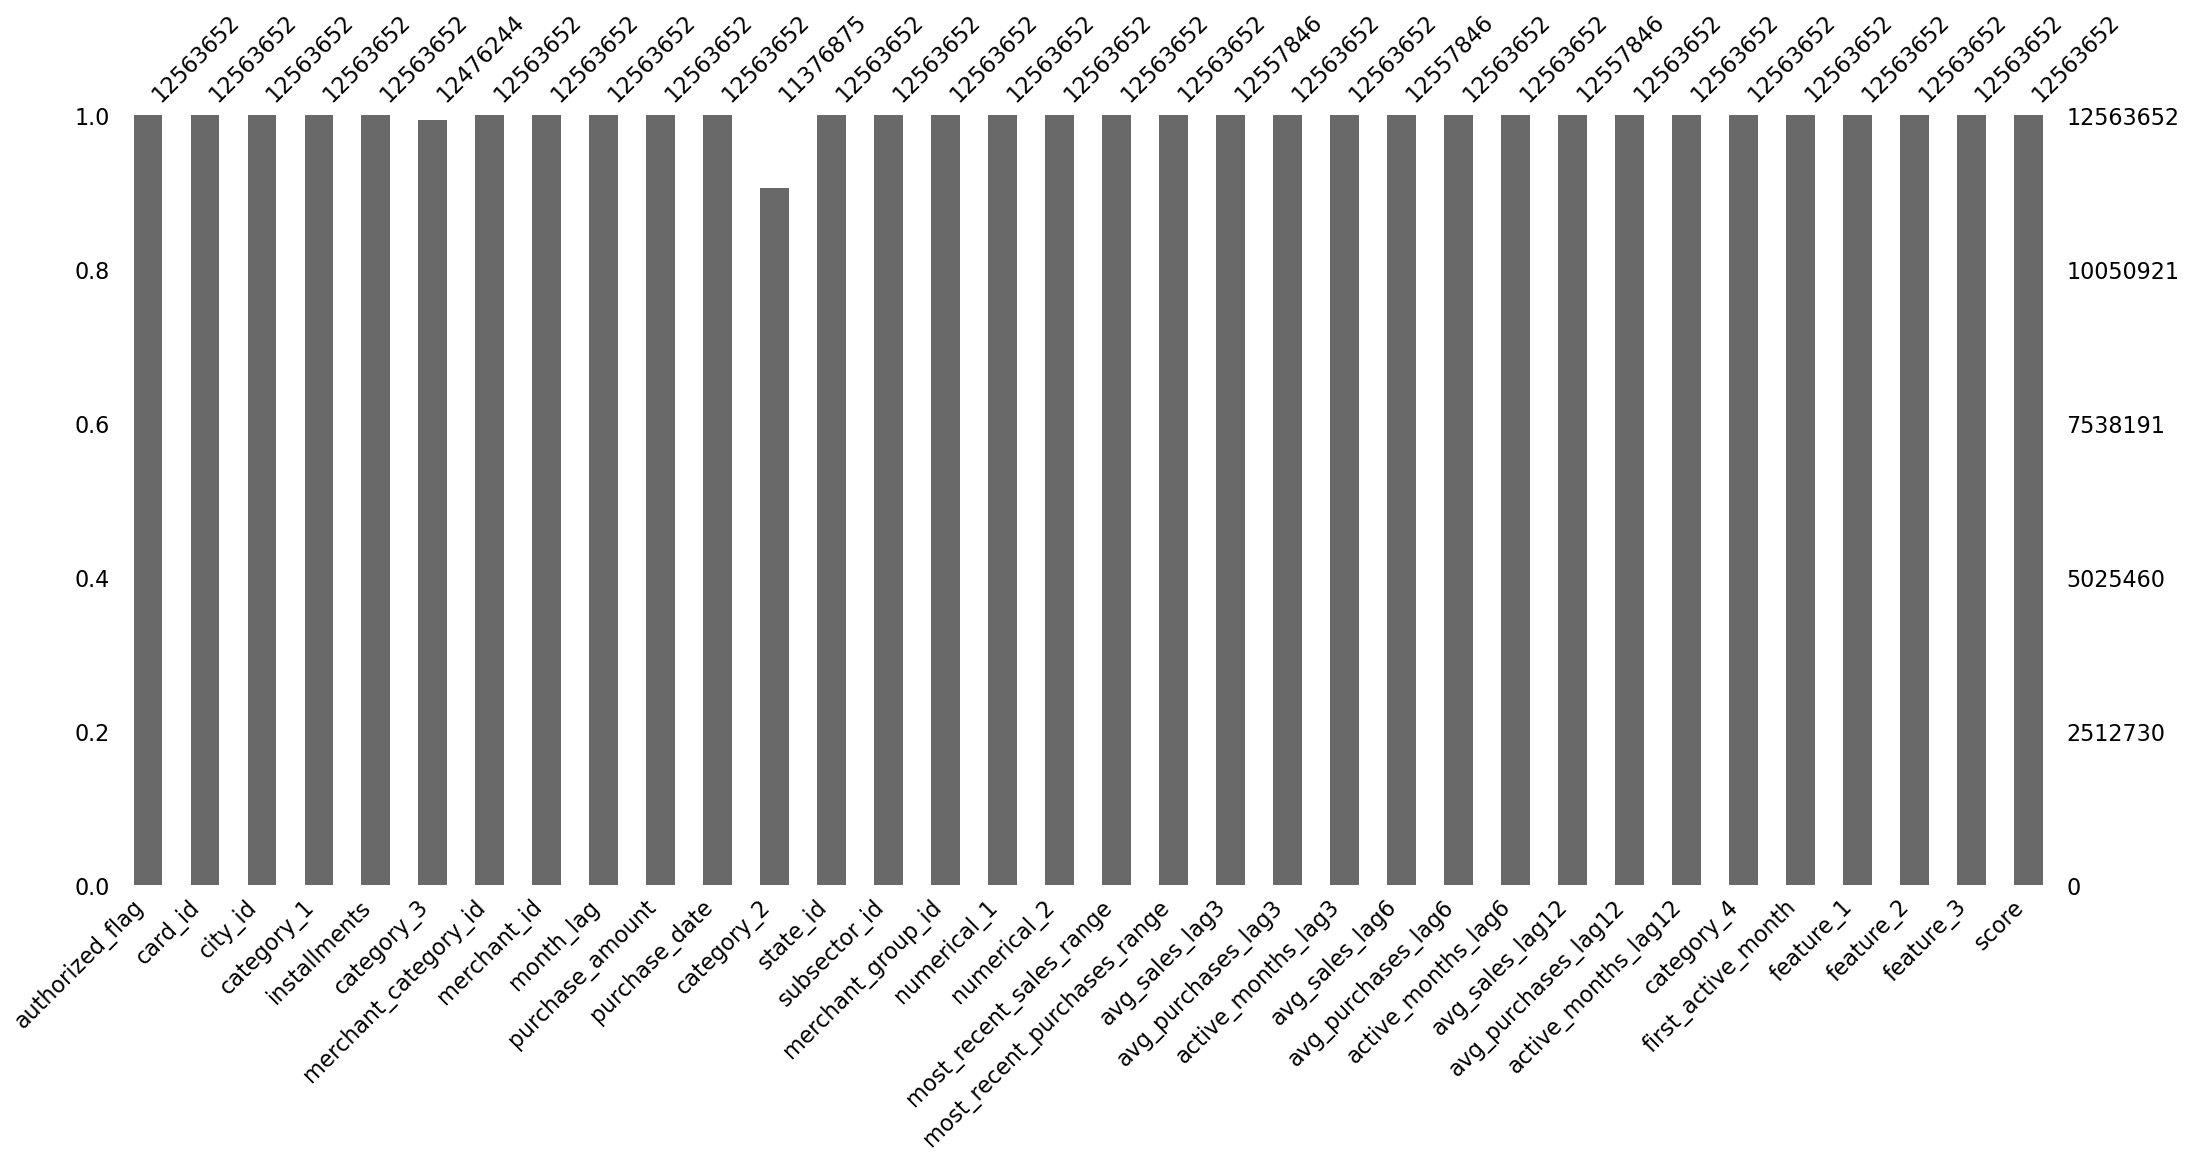

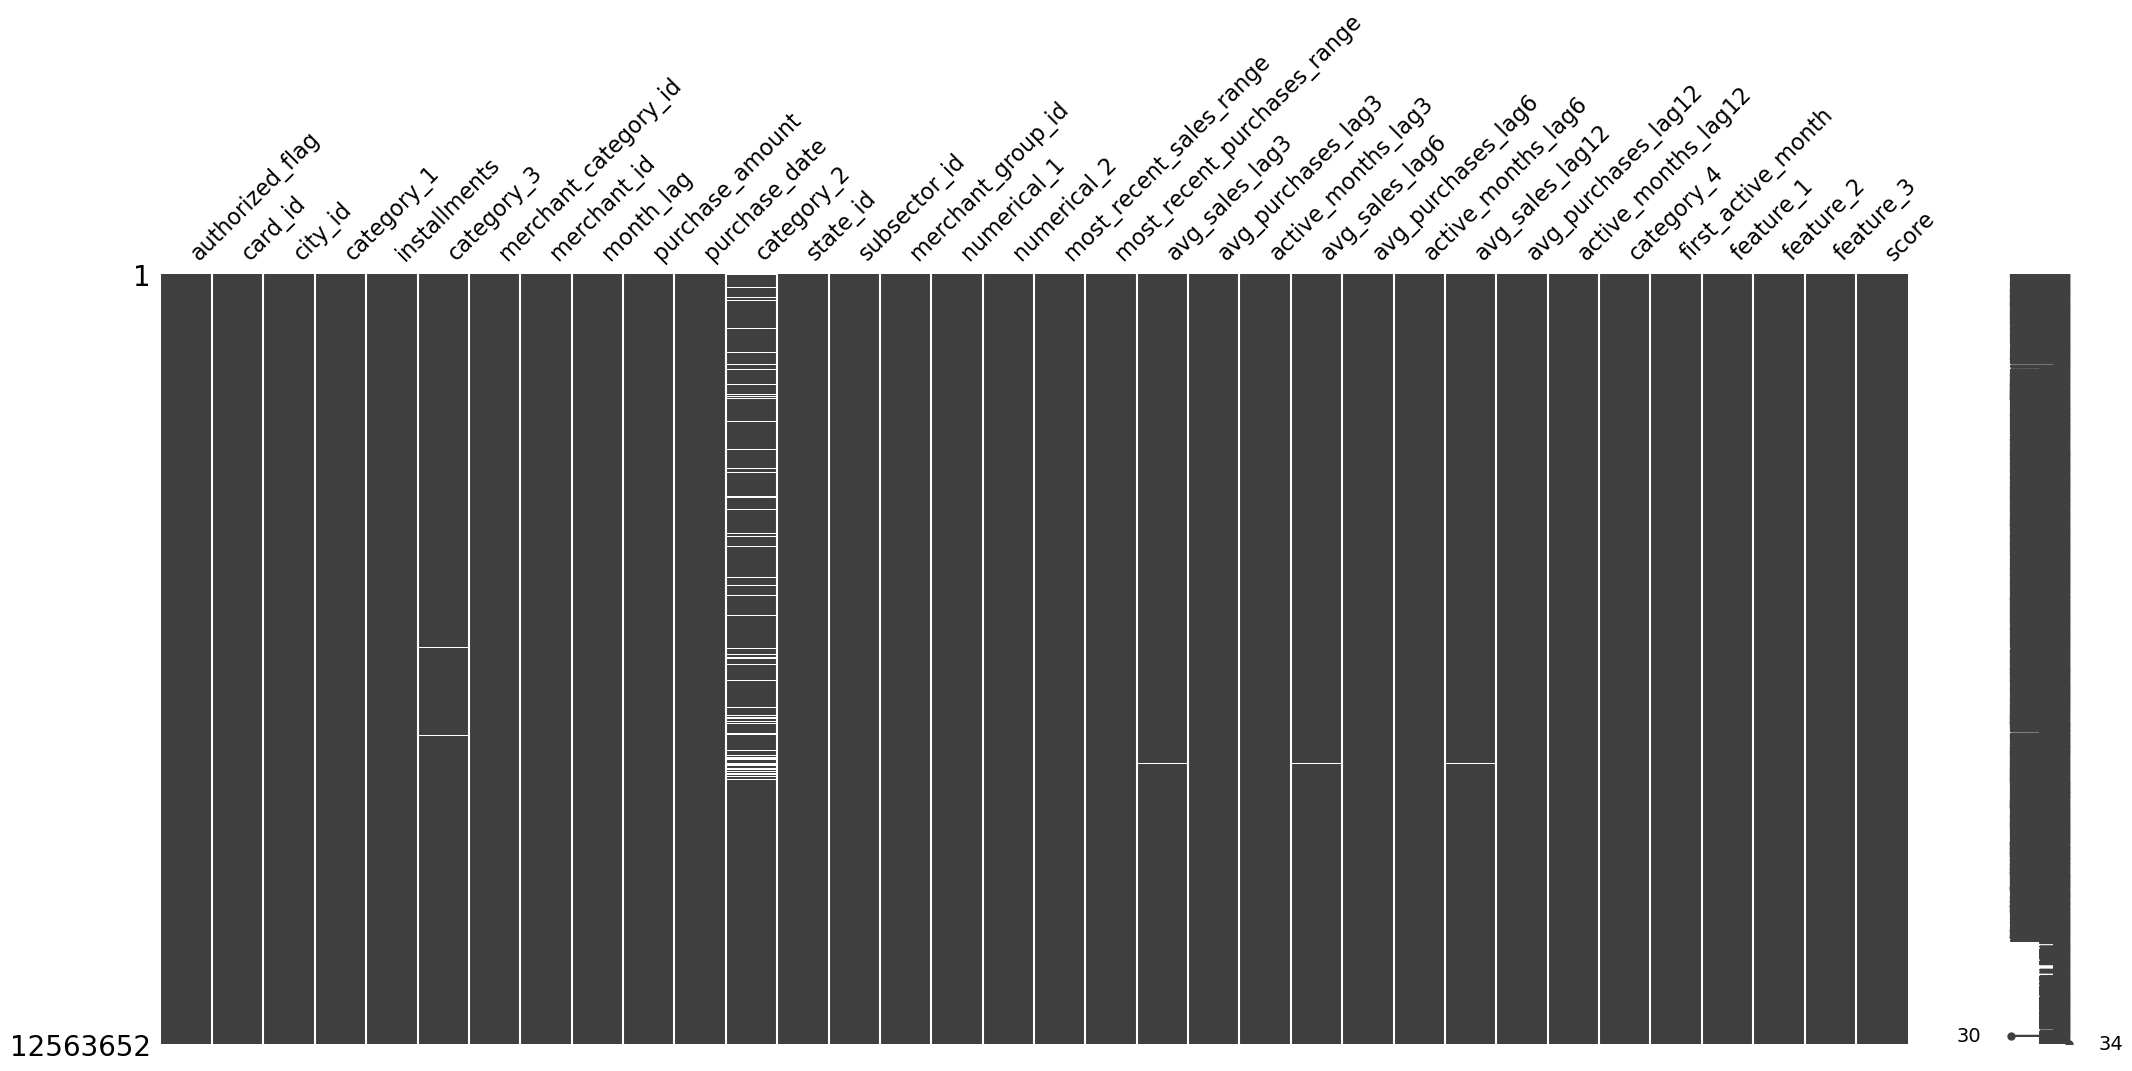

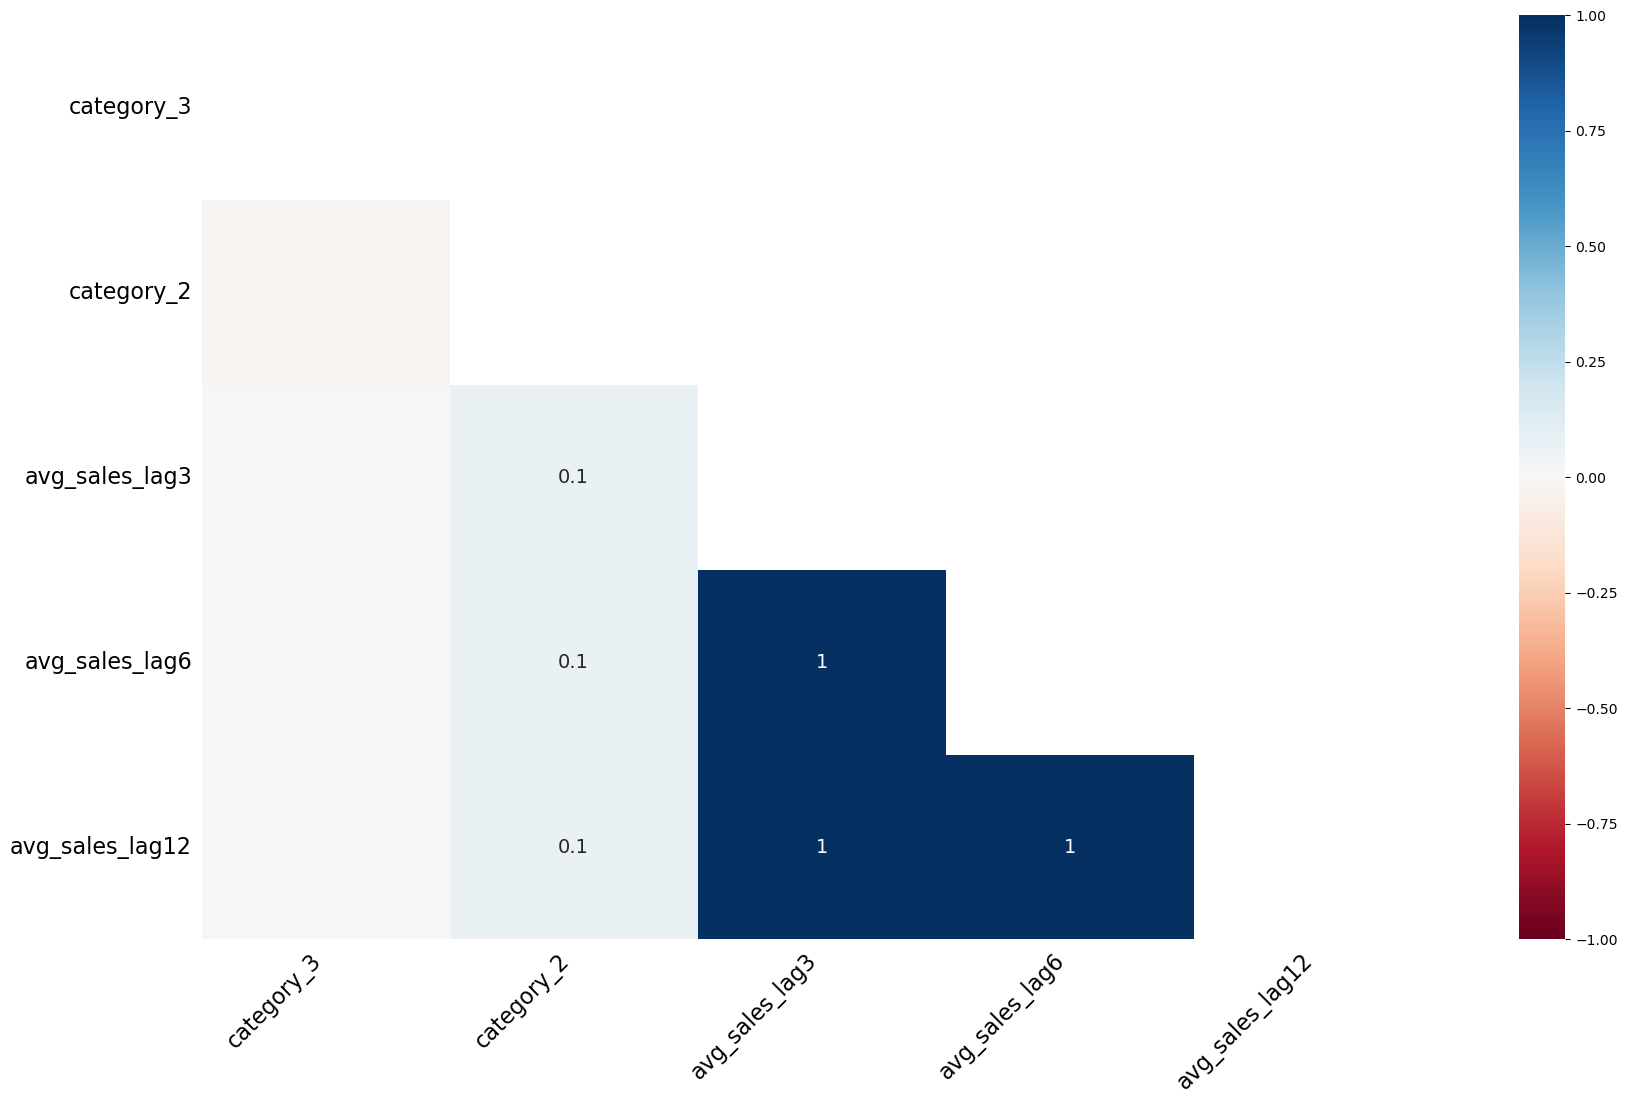

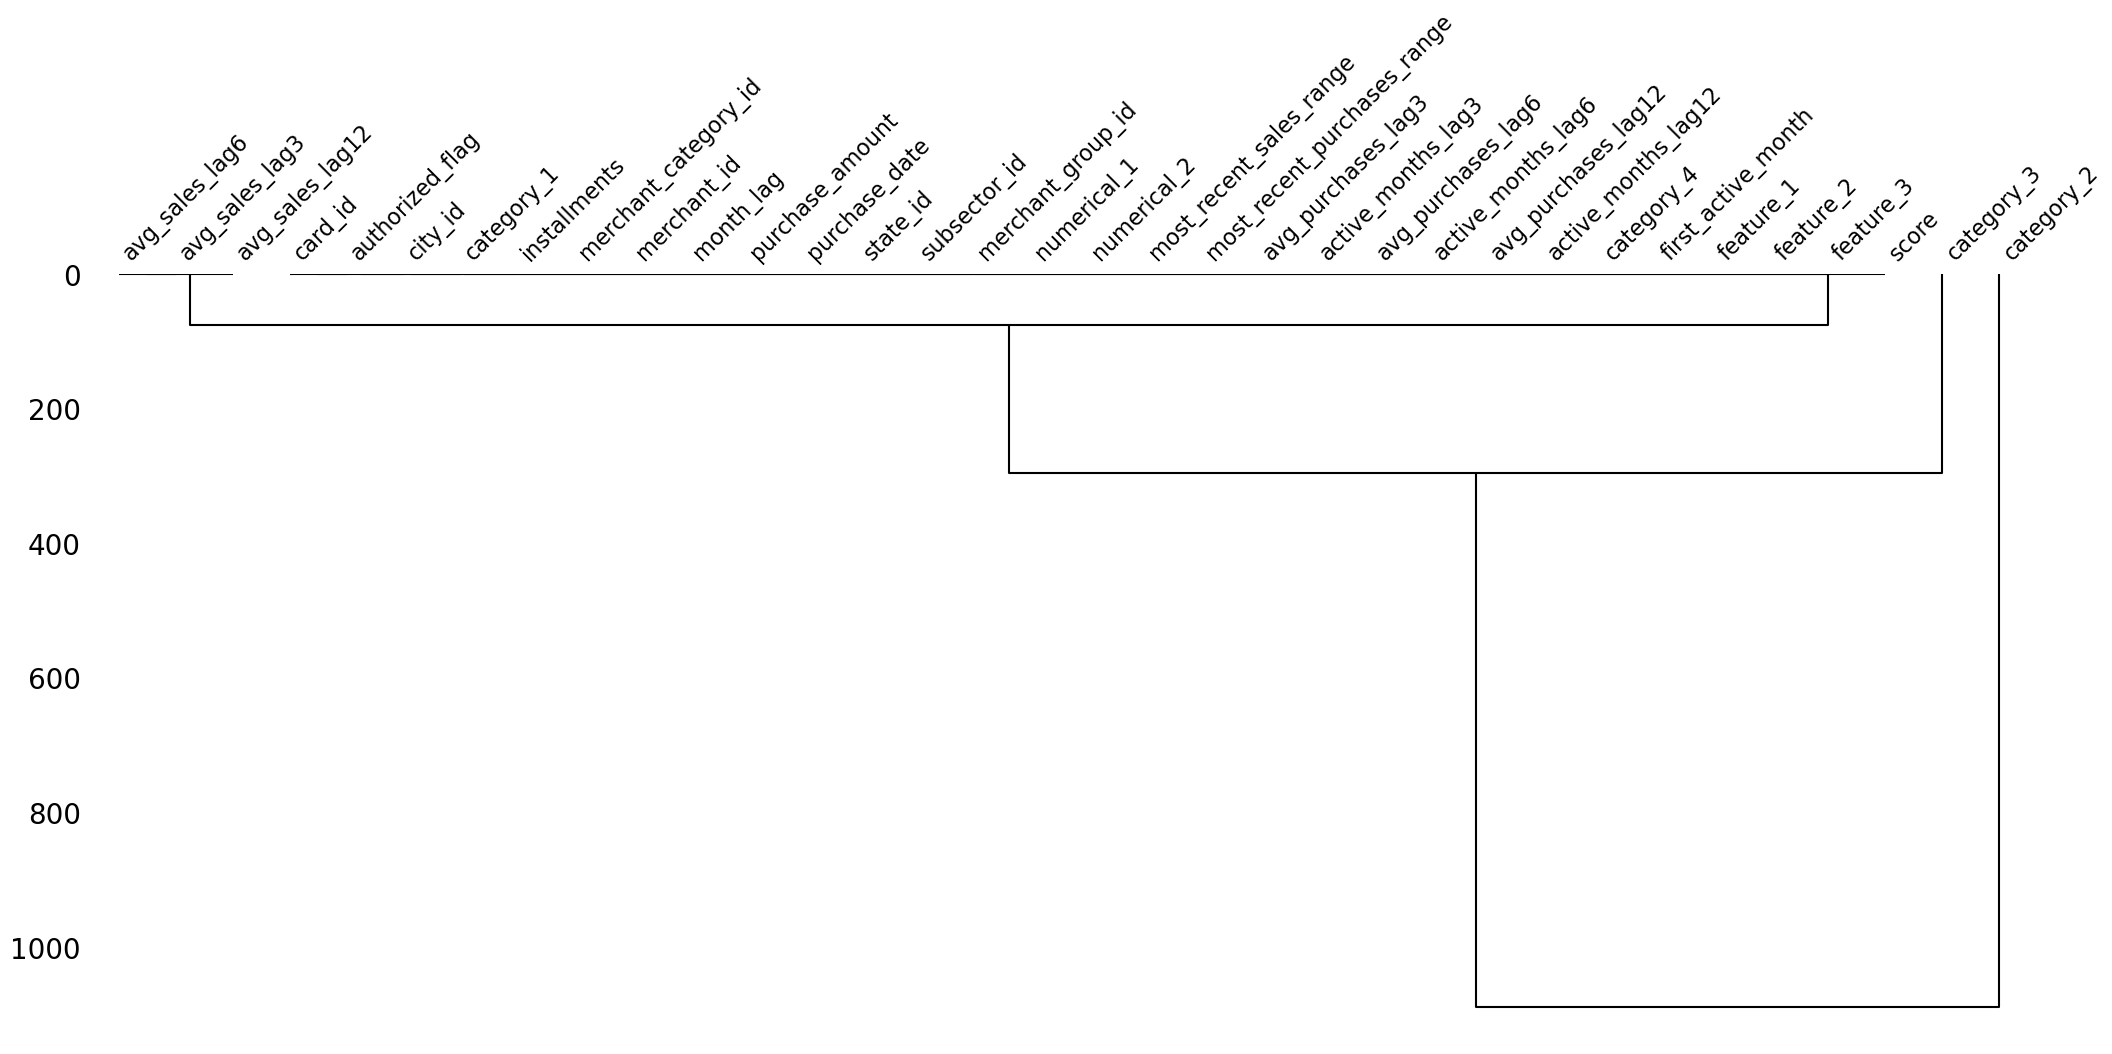

In [7]:
total_miss = result3.isnull().sum()
percent_miss = (total_miss/result3.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

#analyzing missing data
#bar chart
msno.bar(result3)

#visualize missing values as a matrix
msno.matrix(result3)

#heapmap for correlation analysis
msno.heatmap(result3)

#dendrogram plot
msno.dendrogram(result3)

# The above correlation visualization is based on the following steps, you can consider them if you want to access to a 
# matrix showing the missing value status of each attribute for each record.
df_ismissing = result3.iloc[:, [i for i, n in enumerate(np.var(result3.isnull(), axis='rows')) if n > 0]].isnull()
df_ismissing.corr()

We have 5 columns that have missing values

Pattern of missing data: General Pattern 

category_2 and category_3 are Missing Completely at Random, MCAR

avg_sales_lag3, avg_sales_lag12, avg_sales_lag6 always missing values at same time This shows that potentially those data are come from the same resource and highly correlated. Missing at Random MAR



### Perform necessary data cleaning

In [8]:
# result3['category_2'].fillna(result3['category_2'].mean(), inplace=True)
# result3['avg_sales_lag3'].fillna(result3['avg_sales_lag3'].mean(), inplace=True)
# result3['avg_sales_lag6'].fillna(result3['avg_sales_lag6'].mean(), inplace=True)
# result3['avg_sales_lag12'].fillna(result3['avg_sales_lag12'].mean(), inplace=True)
# result3['category_3'].fillna(result3['category_3'].mode()[0], inplace=True) 
result3.dropna(inplace=True)

At first I tried to fill the missing values but it didn't return good results then I tried to drop them it gave me good results

In [41]:
result3.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag_encoded,category_4_encoded,category_3_encoded,most_recent_sales_range_encoded,most_recent_purchases_range_encoded
count,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07
mean,1.225711e+02,6.402080e-01,4.614522e+02,-4.137216e+00,2.456488e-01,7.365876e+05,2.172455e+00,1.072592e+01,2.684501e+01,2.403994e+04,4.322102e+00,4.171541e+00,7.444700e+01,inf,2.999643e+00,7.136807e+01,inf,5.996990e+00,6.726357e+01,inf,1.193341e+01,7.363076e+05,3.099102e+00,1.733425e+00,5.406364e-01,-4.649742e-01,9.215218e-01,5.771491e-01,1.468020e+00,3.383067e+00,3.489815e+00
std,9.600395e+01,2.518455e+00,2.409172e+02,3.772919e+00,1.701168e+03,1.213663e+02,1.443103e+00,6.427992e+00,1.002161e+01,3.227986e+04,2.027151e+01,1.994435e+01,7.854462e+03,NaN,2.413515e-02,7.509595e+03,NaN,9.525070e-02,7.520660e+03,NaN,5.272832e-01,2.751636e+02,1.267184e+00,7.138124e-01,4.983460e-01,3.605745e+00,2.689227e-01,4.940122e-01,6.051855e-01,1.272405e+00,1.233833e+00
min,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.300000e+01,-7.469078e-01,7.363300e+05,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-5.747065e-02,-5.747065e-02,-4.000000e-01,3.334953e-01,1.000000e+00,-2.250000e+00,1.670447e-01,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00,7.344420e+05,1.000000e+00,1.000000e+00,0.000000e+00,-3.321928e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.300000e+01,0.000000e+00,2.780000e+02,-7.000000e+00,-7.213627e-01,7.364940e+05,1.000000e+00,9.000000e+00,1.900000e+01,3.500000e+01,-5.747065e-02,-5.747065e-02,9.700000e-01,9.840988e-01,3.000000e+00,9.500000e-01,9.711271e-01,6.000000e+00,9.500000e-01,9.716296e-01,1.200000e+01,7.361770e+05,2.000000e+00,1.000000e+00,0.000000e+00,-8.066553e-01,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
50%,8.800000e+01,0.000000e+00,4.370000e+02,-3.000000e+00,-6.903480e-01,7.366040e+05,1.000000e+00,9.000000e+00,3.300000e+01,5.716000e+03,-3.764084e-02,-5.747065e-02,1.020000e+00,1.024872e+00,3.000000e+00,1.020000e+00,1.033136e+00,6.000000e+00,1.040000e+00,1.052381e+00,1.200000e+01,7.363610e+05,3.000000e+00,2.000000e+00,1.000000e+00,-9.086313e-02,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
75%,1.890000e+02,1.000000e+00,7.050000e+02,-1.000000e+00,-6.089644e-01,7.366850e+05,3.000000e+00,1.600000e+01,3.400000e+01,4.133100e+04,2.598063e-01,2.184858e-02,1.080000e+00,1.089110e+00,3.000000e+00,1.120000e+00,1.117166e+00,6.000000e+00,1.160000e+00,1.154022e+00,1.200000e+01,7.365110e+05,4.000000e+00,2.000000e+00,1.000000e+00,5.339889e-01,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,6.010604e+06,7.368140e+05,5.000000e+00,2.400000e+01,4.100000e+01,1.125860e+05,1.727197e+02,1.707367e+02,8.518446e+05,inf,3.000000e+00,1.513959e+06,inf,6.000000e+00,2.567408e+06,inf,1.200000e+01,7.367260e+05,5.000000e+00,3.000000e+00,1.000000e+00,1.796507e+01,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00


In [12]:
result3.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
category_1                     0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
first_active_month             0
feature_1 

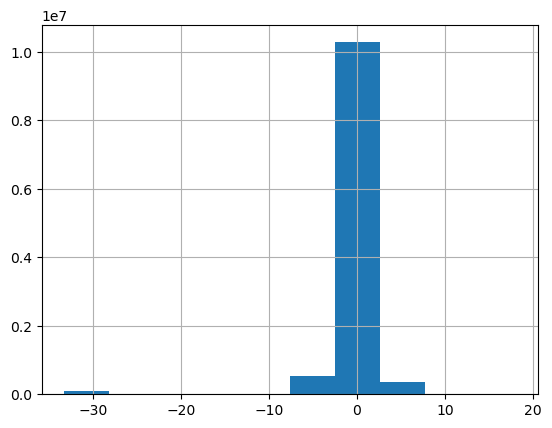

In [29]:
result3['score'].hist();

<Axes: xlabel='category_2', ylabel='score'>

<Axes: xlabel='avg_sales_lag3', ylabel='score'>

<Axes: xlabel='active_months_lag3', ylabel='score'>

<Axes: xlabel='merchant_category_id', ylabel='score'>

<Axes: xlabel='installments', ylabel='score'>

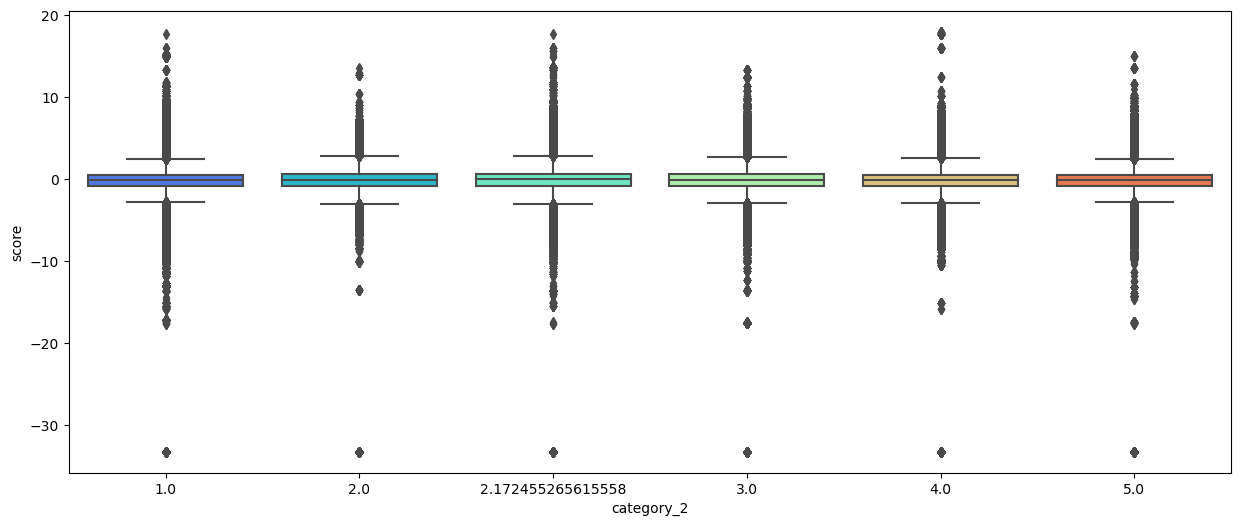

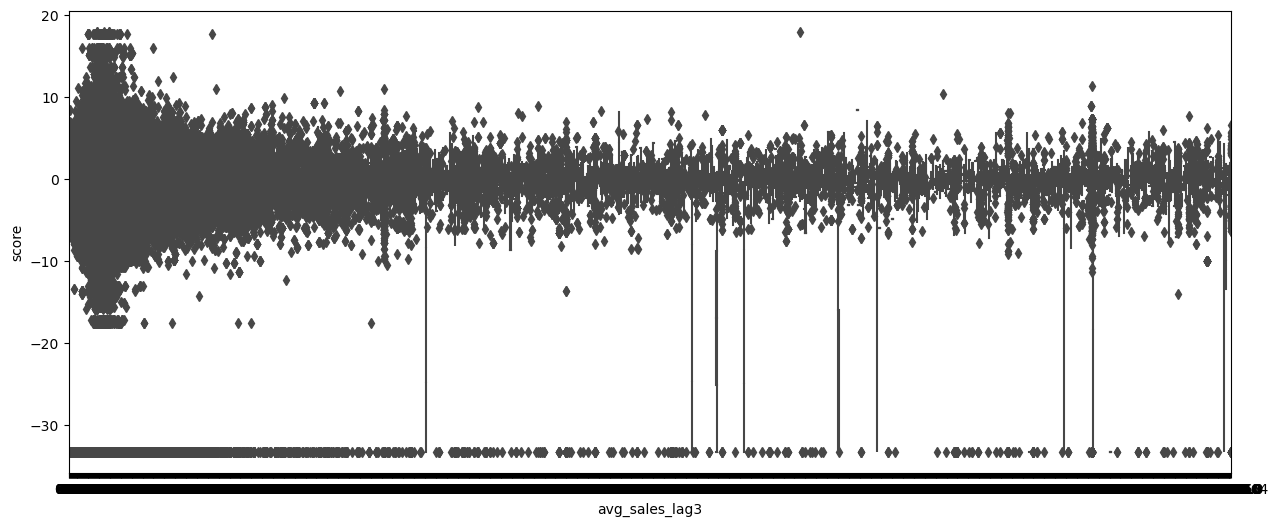

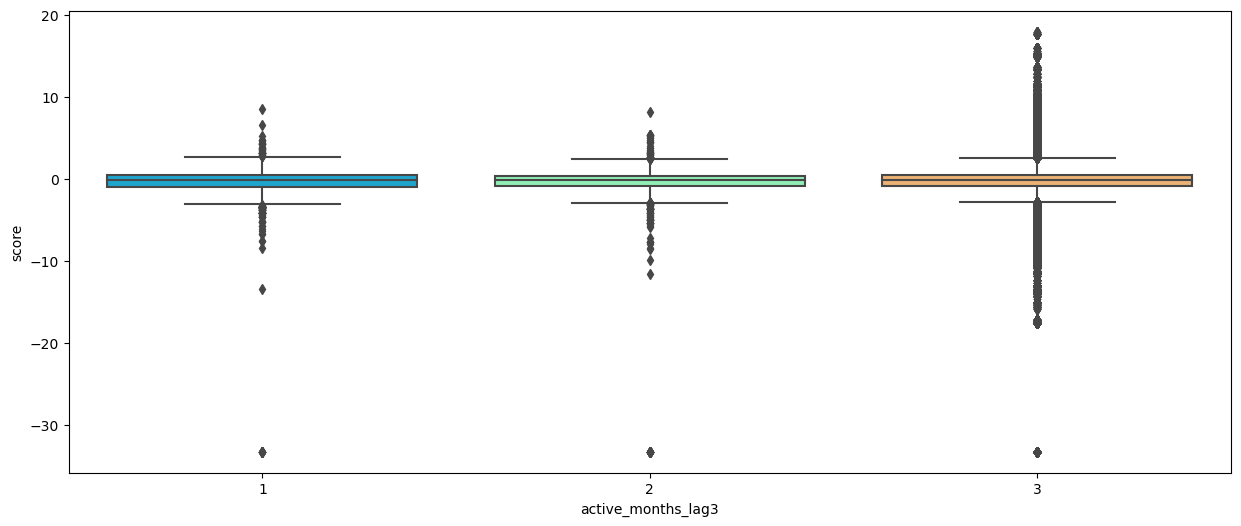

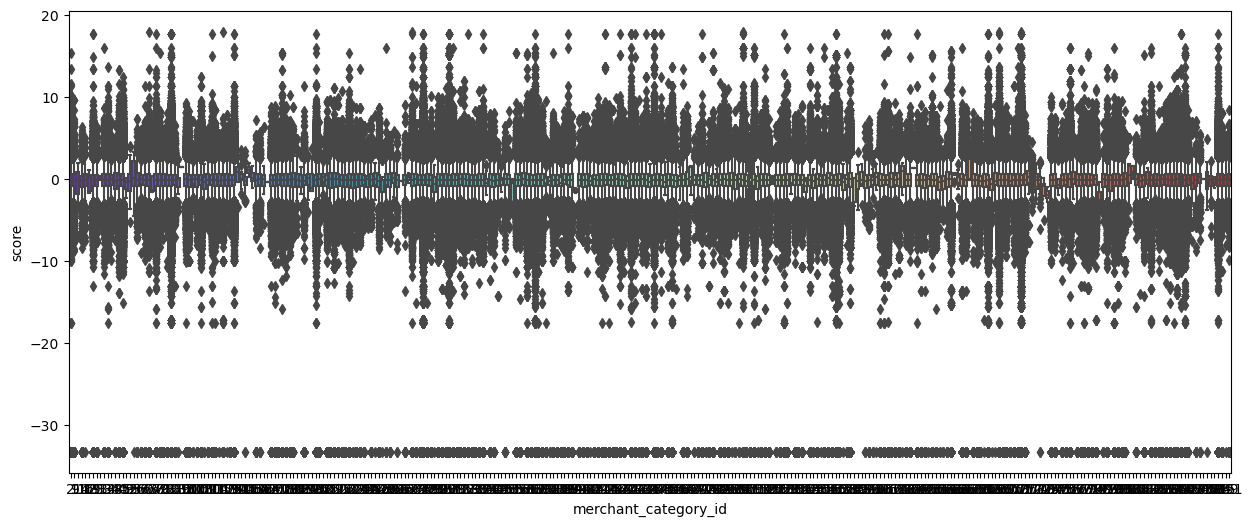

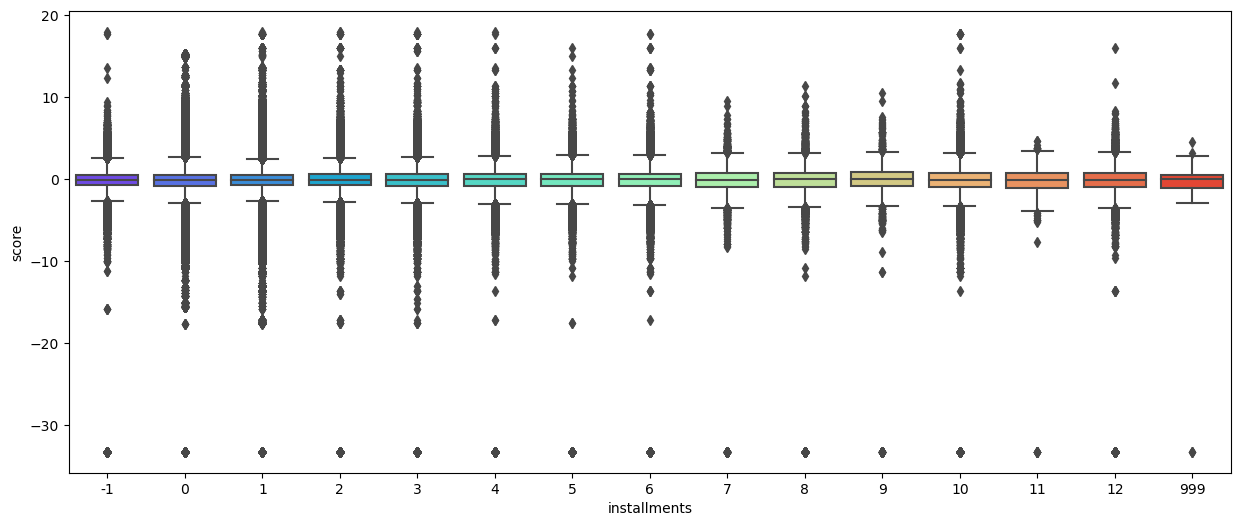

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='category_2',y='score',data=result3,palette='rainbow')
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="avg_sales_lag3", y="score", data=result3,palette='rainbow')

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='active_months_lag3',y='score',data=result3,palette='rainbow')

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='merchant_category_id',y='score',data=result3,palette='rainbow')
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='installments',y='score',data=result3,palette='rainbow')

At first I tried to remove the outliers but didn't return good results but when I return it back get a good result

In [42]:
# check categorical and ordinal features
df = result3.select_dtypes(include=['object', 'category'])
for col in df.columns:
    print(df[col].value_counts()) # to print count of every category 

In [8]:
# Count unique values in each column
object_counts = result3.nunique()

# Print the count of unique values for each column
print("Value counts for object column:")
print(object_counts)

Value counts for object column:
authorized_flag                      2
card_id                         193619
city_id                            271
category_1                           2
installments                        15
category_3                           3
merchant_category_id               313
merchant_id                     207449
month_lag                           16
purchase_amount                 155811
purchase_date                  9582461
category_2                           6
state_id                            24
subsector_id                        40
merchant_group_id                80097
numerical_1                        677
numerical_2                        675
most_recent_sales_range              5
most_recent_purchases_range          5
avg_sales_lag3                    2432
avg_purchases_lag3               79167
active_months_lag3                   3
avg_sales_lag6                    3229
avg_purchases_lag6              103674
active_months_lag6              

Mapping categorical data

In [9]:
sales_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
purchases_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
mapping_cat = {'A': 2, 'B': 1, 'C': 0}
mappingY_N = {'N': 0, 'Y': 1}

result3['authorized_flag'] = result3['authorized_flag'].map(mappingY_N)
result3['category_4'] = result3['category_4'].map(mappingY_N)

result3['category_3'] = result3['category_3'].map(mapping_cat)

result3['most_recent_sales_range'] = result3['most_recent_sales_range'].map(sales_mapping)
result3['most_recent_purchases_range'] = result3['most_recent_purchases_range'].map(purchases_mapping)

Dealing with Datetime data

In [10]:
import datetime as dt
result3['first_active_month'] = pd.to_datetime(result3['first_active_month'], format='%b-%y')
result3['first_active_month']=result3['first_active_month'].map(dt.datetime.toordinal)
result3['purchase_date'] = pd.to_datetime(result3['purchase_date'])
result3['purchase_date']=result3['purchase_date'].map(dt.datetime.toordinal)

In [17]:
# # LabelEncoder for the categorical features
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# categorical_features = df.columns.tolist()
# for feature in categorical_features:
#     result3[feature] = encoder.fit_transform(result3[feature])

In [18]:
result3['score'].value_counts()

score
-33.219281    124613
 0.000000      37545
 0.109291       2548
 1.000000       2428
-1.229752       1711
               ...  
 1.605561          1
-0.958219          1
 0.112621          1
-0.869336          1
-0.880511          1
Name: count, Length: 189138, dtype: int64

In [15]:
pd.set_option('display.max_columns', None)
result3.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,merchant_group_id,numerical_1,numerical_2,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag_encoded,category_4_encoded,category_3_encoded,most_recent_sales_range_encoded,most_recent_purchases_range_encoded
0,Y,C_ID_d244d8976d,88,N,0,A,80,M_ID_e020e9b302,-4,-0.713098,736629,1.0,16,37,35,23.470597,23.014512,A,A,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y,736542,3,2,1,-0.168948,1,1,2,5,5
1,Y,C_ID_d244d8976d,69,N,0,A,278,M_ID_f86439cec0,0,-0.699694,736727,1.0,9,37,35,117.830742,116.888826,A,A,1.08,1.092926,3,1.09,1.095924,6,1.13,1.125829,12,Y,736542,3,2,1,-0.168948,1,1,2,5,5
2,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.684488,736585,1.0,9,33,1145,3.174788,-0.047556,A,A,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,Y,736542,3,2,1,-0.168948,1,1,2,5,5
3,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,0,-0.665855,736748,1.0,9,33,1145,3.174788,-0.047556,A,A,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,Y,736542,3,2,1,-0.168948,1,1,2,5,5
4,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.695893,736592,1.0,9,33,1145,3.174788,-0.047556,A,A,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,Y,736542,3,2,1,-0.168948,1,1,2,5,5


In [20]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563652 entries, 0 to 12563651
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              int64  
 1   card_id                      int64  
 2   city_id                      int64  
 3   category_1                   int64  
 4   installments                 int64  
 5   category_3                   int64  
 6   merchant_category_id         int64  
 7   merchant_id                  int64  
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                int64  
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      int64  
 18  most_recent_purchases_range  int64  
 19

Check the normality of the target variable, i.e., 'score', using both graphical and statistical test methods.

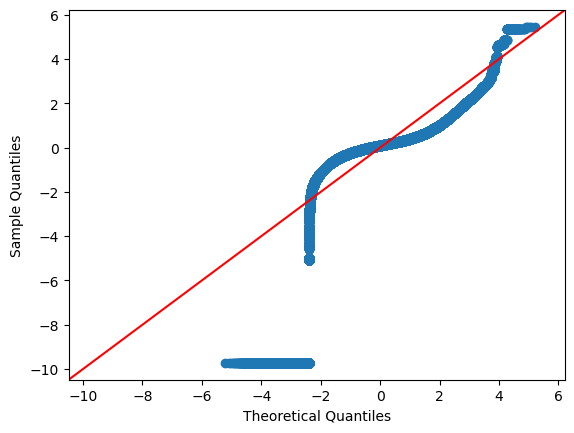

/tmp/ipykernel_5454/984079393.py:24: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



p = 0
p = 0
The null hypothesis can be rejected


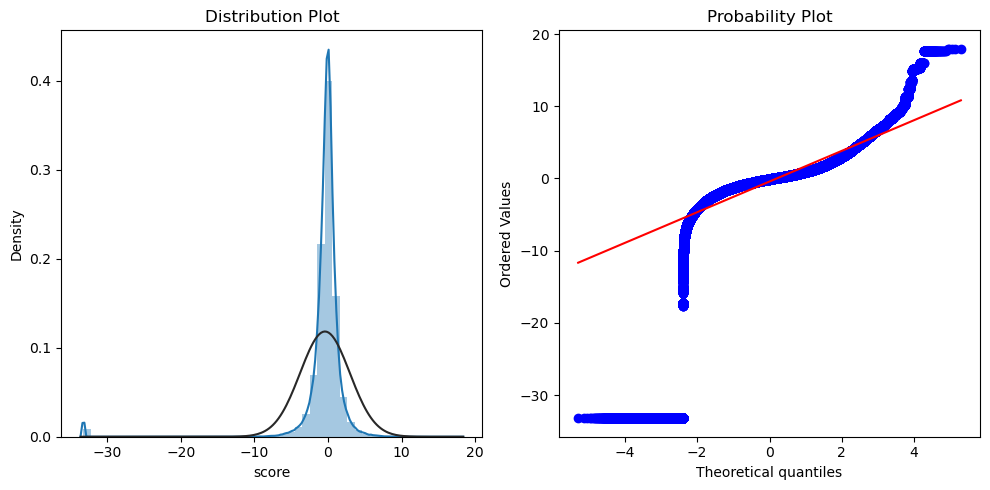

In [32]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(result3['score'], line='45', fit = True)
plt.show()

# another way to perform graphical method.
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')
    #`probplot` generates a probability plot, which should not be confused with a Q-Q or a P-P plot.  Statsmodels has more extensive functionality of this type, see ``statsmodels.api.ProbPlot``
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(result3['score'])



# Shapiro-wilk test
w, pvalue = stats.shapiro(result3['score'])
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test, 
k2, p = stats.normaltest(result3['score'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


As a result of the tests the score column isn't normaly distrebuted

#### I will test hypothesis on authorized_flag and purchase_amount

- purchase_amount : The Normalized amount of transaction
- category_3 :anonymized category


- If the amount of purshase is high that means that the user is loyal
- If category_3 is A the user is loyal

In [34]:
from scipy import stats           # Submodule for statistical functions and tests

high = result3.loc[result3['purchase_amount']>0]['score']
low = result3.loc[result3['purchase_amount']<=0]['score']


stats.mannwhitneyu(x=high, y=low, alternative = 'two-sided')

MannwhitneyuResult(statistic=1843874747487.5, pvalue=2.235132179548261e-09)

Hypothis :is the loyalty of the customer increase when "purchase_amount" >0 ? 
- H0 : there is no increase in loyalty score 
- H1 : there is increase in loyalty score 

As the pvalue<0.05
the null was rejected
- when the the purchase_amount is Low (Less than zero), the user can still be loyal

In [37]:
from scipy import stats           # Submodule for statistical functions and tests

high = result3.loc[result3['category_3']=="A"]['score']
low = result3.loc[result3['category_3']!= "A"]['score']


stats.mannwhitneyu(x=high, y=low, alternative = 'two-sided')

MannwhitneyuResult(statistic=15238212123449.5, pvalue=0.0)

Hypothis :does the loyality score of the customer change when "category_3" = A ? 
- H0 : there is no change in score 
- H1 : there is change in the score

As the pvalue<0.05
the null was rejected
- when the category_3 is A, the user can still be loyal

_______________________________________________________________________________________________________________________________

Randomly split your selected dataset into training and testing sets based on the
results and preprocessing data from answers to above questions.


Create a regression model for user loyalty score prediction
based on the above analysis. You need to determine what features to use
and which regression model to use.

In [11]:
# First Regression Model!
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

selected_attributes= ["authorized_flag","category_1","installments","category_3","month_lag","category_2","purchase_amount","numerical_1","purchase_date",
                   "numerical_2","most_recent_sales_range","most_recent_purchases_range","avg_sales_lag3","active_months_lag3",
                   "avg_sales_lag6","active_months_lag3","avg_sales_lag6","active_months_lag6","avg_sales_lag12",
                   "active_months_lag12","category_4","first_active_month","feature_1","feature_2","feature_3","score"]
selected_data = result3[selected_attributes]



#feature scaling and dummy attributes creation
numerical_cols = list(selected_data.select_dtypes(exclude=['object']).columns)
#for sale_price and sale_price_log, we do not want to scale them
numerical_cols = numerical_cols[:-1]
scaler = RobustScaler()
selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])

#selected_data = pd.get_dummies(selected_data, drop_first=True)
print("final data shape", selected_data.shape)

selected_data.to_csv('first_attempt_raw.csv', index=False)

# split the data into train and test set
train, test = train_test_split(selected_data, test_size=0.2, shuffle=True, random_state=123)

y_train = train['score']
y_test = test['score']
X_train = train.drop(['score'], axis=1)
X_test  = test.drop(['score'], axis=1)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

/tmp/ipykernel_375/2490119665.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])


final data shape (11292220, 26)


#### Based on the correlation heatmap I haven't selected the columns of (avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12) as there is a big relation between them in the selected columns that the model is going to train on 

In [25]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train, y_train)
    print("RMSE train: {}".format(rmse(y_train, model.predict(X_train))))
    print("RMSE test : {}".format(rmse(y_test,  model.predict(X_test))))
    # model.fit(X_train, y_train_log)
    # print("RMSE train log-scale: {}".format(rmse(y_train_log, model.predict(X_train))))
    # print("RMSE test log-scale: {}".format(rmse(y_test_log,  model.predict(X_test))))
    # model.fit(X_train, y_train_log)
    # print("RMSE train log-scale: {}".format(rmse(y_train, np.exp(model.predict(X_train))-1)))
    # print("RMSE test log-scale: {}".format(rmse(y_test,  np.exp(model.predict(X_test))-1)))

    # visualizer = ResidualsPlot(model)

#     visualizer.fit(X_train.values, y_train.values)  # Fit the training data to the visualizer
#     visualizer.score(X_test.values, y_test.values)  # Evaluate the model on the test data
#     visualizer.show()                 # Finalize and render the figure
    plt.scatter(y_test, np.exp(model.predict(X_test))-1, s=5 )
    plt.scatter(y_test, model.predict(X_test), s=5 )
    plt.xlabel('Real score')
    plt.ylabel('Predicted score')
    plt.title( "Real vs Predicted loyalty")
    plt.show()

    plt.scatter( y_test,model.predict(X_test)-y_test, s=5)
    plt.xlabel('Real score')
    plt.ylabel('Residual')
    plt.title( "Residuals vs Real")
    plt.show()

def residual_plots(X_train, X_test, Y_train, Y_test, Predicted_Y_train, Predicted_Y_test):
    interested_attribute_groups = ['']

LinearRegression()
RMSE train: 3.3445682837702986
RMSE test : 3.338998550022306


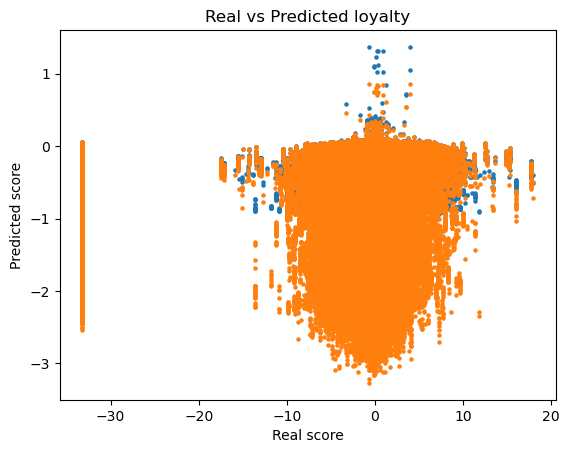

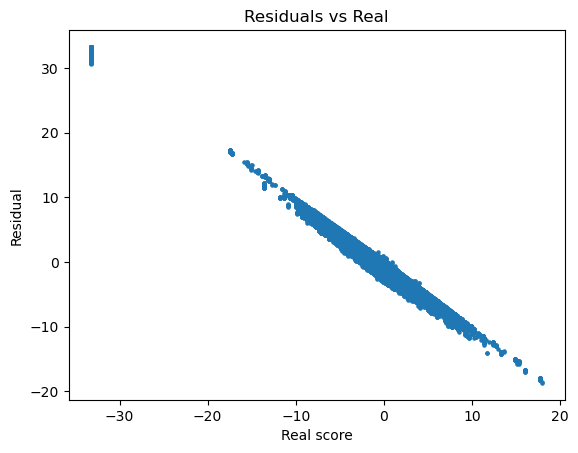

Ridge(alpha=20.0)
RMSE train: 3.3445682811708846
RMSE test : 3.338998507329581


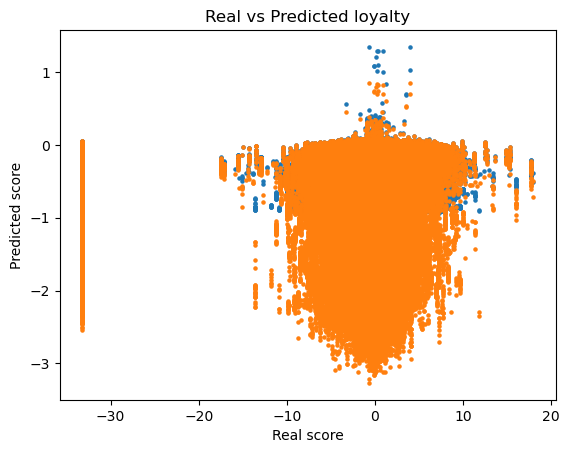

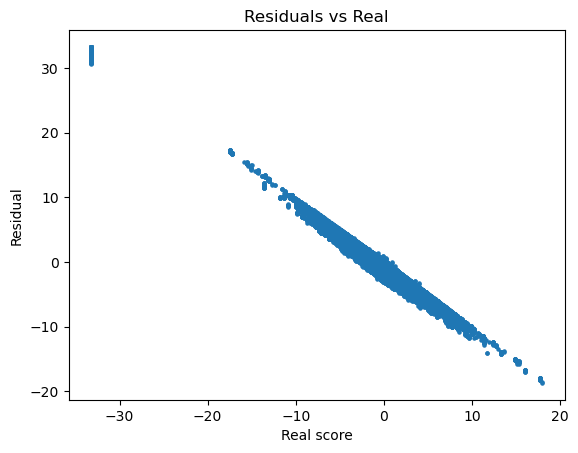

In [26]:
# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=50000)

for model in [model_base, model_ridge]:
    train_test(model)

The result of training the linearRegression model on the data 
- RMSE train: 3.3445682811708846
- RMSE test : 3.338998507329581

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creating an instance of the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Training the model
gb_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

I tried to train with GradientBoostingRegressor but it get